## WHO API

In [1]:
import requests;

url     = "https://covid-19-coronavirus-statistics.p.rapidapi.com/v1/stats";
query   = {"country":"Mexico"};
headers = {
    'x-rapidapi-host': "covid-19-coronavirus-statistics.p.rapidapi.com",
    'x-rapidapi-key': "7e6cf1dbafmsha291e24ccb65407p1469b1jsn307b9be6aeef"
};

response = requests.request("GET", url, headers=headers, params=query);
print(response.text);

{"error":false,"statusCode":200,"message":"OK","data":{"lastChecked":"2020-04-27T16:22:11.473Z","covid19Stats":[{"city":null,"province":null,"country":"Mexico","lastUpdate":"2020-04-27T02:30:33+00:00","keyId":"Mexico","confirmed":14677,"deaths":1351,"recovered":8354}]}}


---
##### https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
---

## 'Our World in Data' data compilation
#### Sourced from the World Health Organization (WHO) Situation Reports
##### https://ourworldindata.org/coronavirus
##### https://ourworldindata.org/coronavirus-source-data; https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
##### https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

In [2]:
# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from datetime import datetime, timedelta

# CONSTANTS
markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
    "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
#     '#b71c1c', #red darken-4
#     '#1a237e', #indigo darken-4
#     '#004d40', #teal darken-4
#     '#f57f17', #yellow darken-4
#     '#3e2723', #brown darken-4    
#     '#4a148c', #purple darken-4
#     '#01579b', #light-blue darken-4
#     '#33691e', #light-green darken-4
#     '#e65100', #orange darken-4
#     '#263238', #blue-grey darken-4
#     '#880e4f', #pink darken-4
#     '#0d47a1', #blue darken-4
#     '#1b5e20', #green darken-4
#     '#ff6f00', #amber darken-4
#     '#212121', #grey darken-4
#     '#311b92', #deep-purple darken-4
#     '#006064', #cyan darken-4
#     '#827717', #lime darken-4
#     '#bf360c',  #deep-orange darken-4
    
    '#f44336', #red
    '#e91e63', #pink
    '#9c27b0', #purple
    '#673ab7', #deep-purple
    '#3f51b5', #indigo
    '#2196f3', #blue
    '#03a9f4', #light-blue
    '#00bcd4', #cyan
    '#009688', #teal
    '#4caf50', #green
    '#8bc34a', #light-green
    '#cddc39', #lime
    '#ffeb3b', #yellow
    '#ffc107', #amber
    '#ff9800', #orange
    '#ff5722', #deep-orange
    '#795548', #brown
    '#9e9e9e'  #grey
];

# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index
# df_raw = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv", delimiter=",");
df_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv", delimiter=",");

### Print all countries

In [3]:
print('; '.join(df_raw.iloc[:]['location'].drop_duplicates()))

Afghanistan; Albania; Algeria; Andorra; Angola; Anguilla; Antigua and Barbuda; Argentina; Armenia; Aruba; Australia; Austria; Azerbaijan; Bahamas; Bahrain; Bangladesh; Barbados; Belarus; Belgium; Belize; Benin; Bermuda; Bhutan; Bolivia; Bonaire Sint Eustatius and Saba; Bosnia and Herzegovina; Botswana; Brazil; British Virgin Islands; Brunei; Bulgaria; Burkina Faso; Burundi; Cambodia; Cameroon; Canada; Cape Verde; Cayman Islands; Central African Republic; Chad; Chile; China; Colombia; Congo; Costa Rica; Cote d'Ivoire; Croatia; Cuba; Curacao; Cyprus; Czech Republic; Democratic Republic of Congo; Denmark; Djibouti; Dominica; Dominican Republic; Ecuador; Egypt; El Salvador; Equatorial Guinea; Eritrea; Estonia; Ethiopia; Faeroe Islands; Falkland Islands; Fiji; Finland; France; French Polynesia; Gabon; Gambia; Georgia; Germany; Ghana; Gibraltar; Greece; Greenland; Grenada; Guam; Guatemala; Guernsey; Guinea; Guinea-Bissau; Guyana; Haiti; Honduras; Hungary; Iceland; India; Indonesia; Internati

In [4]:
allcountries = ["Afghanistan","Albania","Algeria","Andorra","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Benin","Bhutan","Bolivia","Bosnia and Herzegovina","Brazil","Brunei","Bulgaria","Burkina Faso","Cambodia","Cameroon","Canada","Central African Republic","Chile","China","Colombia","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Cyprus","Czech Republic","Democratic Republic of Congo","Denmark","Djibouti","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Finland","France","French Polynesia","Gabon","Gambia","Georgia","Germany","Ghana","Greece","Guam","Guatemala","Guinea","Guyana","Honduras","Hungary","Iceland","India","Indonesia","International","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kosovo","Kuwait","Kyrgyzstan","Latvia","Lebanon","Liberia","Liechtenstein","Lithuania","Luxembourg","Macedonia","Malaysia","Maldives","Malta","Mauritania","Mexico","Moldova","Monaco","Mongolia","Montenegro","Morocco","Myanmar","Namibia","Nepal","Netherlands","New Zealand","Nicaragua","Nigeria","Norway","Oman","Pakistan","Palestine","Panama","Paraguay","Peru","Philippines","Poland","Portugal","Qatar","Romania","Russia","Rwanda","Saint Lucia","Saint Vincent and the Grenadines","San Marino","Saudi Arabia","Senegal","Serbia","Seychelles","Singapore","Slovakia","Slovenia","Somalia","South Africa","South Korea","Spain","Sri Lanka","Sudan","Suriname","Swaziland","Sweden","Switzerland","Taiwan","Tanzania","Thailand","Togo","Trinidad and Tobago","Tunisia","Turkey","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan","Vatican","Venezuela","Vietnam","Zambia"];

### function to plot the number of 'new_cases', 'new_deaths', 'total_cases' or 'total_deaths' per country

In [5]:
def covid19plot(y_str, countries, legPos='upper left', logScale=False):
    # Assign a numeric value to string data type values
    df_num = df_raw.copy();
    for col in range(len(df_raw.columns)):
        if str(type(df_raw.iloc[0 , col])) == "<class 'str'>":
            df_num.iloc[: , col] = number.fit_transform(df_raw.iloc[: , col].astype('str'))

    # Define x axis as the date axis
    x_str = 'date'; x_units = r'$[Y-M-D]$';
    y_units = r'$[No. cases]$';

    # Remove NANs from interesting x,y data
    df_fil = pd.DataFrame(df_raw);
    df_fil = df_fil.join(
        pd.DataFrame(
            df_num.iloc[:]['location']
        ).rename(
            columns={"location": "locationID"}
        )
    );
    df_fil = df_fil.dropna(subset=[x_str, y_str]);

    # PLOT SETUP
    scale = 7;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();
    
    reffontsize = 16;

    # Stablish the plot area
    ax0 = plt.gca()
    
    if logScale:
        plt.yscale('log');
        # plt.xscale('log');

    texts_ax0 = [];
    for c in countries:
        # Extract data from a specific country
        df_county = df_fil[df_fil.location.isin([c])]
        if logScale:
            df_county = df_county[df_county[y_str] > 0]
        
        x      = df_county.iloc[:]['date'];
        x      = [datetime.strptime(d,"%Y-%m-%d").date() for d in x]
        y      = df_county.iloc[:][y_str];

        # Extract country details
        locName   = df_county.iloc[:]['location'];
        locColour = df_county.iloc[:]['locationID'];

        # Plot each point individually to give each a defined color according to its related polymer
        ci_col    = 0;
        eleCount  = 0;
        stringCnt = '';
        leny      = len(y);
        try:
            maxy = max(y);
        except ValueError:
            maxy = 0;
        for xi, yi, ci, ni in zip(x, y, locColour, locName):
            # add data points
            ci_col = ci%len(markerColour)
            ci_sym = ci%len(markerSymbol)
            ax0.scatter(xi, yi, s=32, label=ni, c=markerColour[ci_col], marker=markerSymbol[ci_sym]);
            
            # add annotations (references on each point)
            eleCount = eleCount + 1;
            stryi = str(yi) + ':' + c;
            #if ((yi==maxy) or (eleCount==len(y))) and not(stryi in stringCnt) and (yi > 0):
            if (eleCount==len(y)) and not(stryi in stringCnt) and (yi > 0):
                # Add text annotations to the axes
                print(stryi)
                texts_ax0.append(ax0.text(xi, yi, stryi, fontsize=reffontsize));
                stringCnt = stringCnt + stryi + ', ';

        # Plot a curve to join the data points
        plt.plot(x, y, color=markerColour[ci_col])
        
    # avoid overlaps between annotations and add a linking line
    kwargs = dict(transform=ax0.transAxes);
    adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    locator = mdates.AutoDateLocator();#minticks=20, maxticks=24)
    formatter = mdates.ConciseDateFormatter(locator)
    ax0.xaxis.set_major_locator(locator)
    ax0.xaxis.set_major_formatter(formatter)

    fig.autofmt_xdate();
    #ax0.set_xlabel(x_str + '    ' + x_units, fontsize=24);
    ax0.set_ylabel(y_str + '    ' + y_units, fontsize=24);
    
    ax0.spines['top'].set_visible(False);
    ax0.spines['right'].set_visible(False);

    # Display main plot
    if len(countries)<26: plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc=legPos);
    plt.savefig('plt_' + x_str.replace(" ", "") + '_vs_' + y_str.replace(" ", "") + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---

In [6]:
def covid19plotshifted(y_str, countries, legPos='upper left', logScale=False):
    # Assign a numeric value to string data type values
    df_num = df_raw.copy();
    for col in range(len(df_raw.columns)):
        if str(type(df_raw.iloc[0 , col])) == "<class 'str'>":
            df_num.iloc[: , col] = number.fit_transform(df_raw.iloc[: , col].astype('str'))

    # Define x axis as the date axis
    x_str = 'date'; x_units = r'$\rightarrow$';
    y_units = r'$[No. cases]$';

    # Remove NANs from interesting x,y data
    df_fil = pd.DataFrame(df_raw);
    df_fil = df_fil.join(
        pd.DataFrame(
            df_num.iloc[:]['location']
        ).rename(
            columns={"location": "locationID"}
        )
    );
    df_fil = df_fil.dropna(subset=[x_str, y_str]);

    # PLOT SETUP
    scale = 7;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();
    
    reffontsize = 16;

    # Stablish the plot area
    ax0 = plt.gca()
    
    if logScale:
        plt.yscale('log');
        # plt.xscale('log');

    for c in countries:
        # Extract data from a specific country
        df_county = df_fil[df_fil.location.isin([c])]
        if logScale:
            df_county = df_county[df_county[y_str] > 0]

        # Rome data without incidents
        y      = df_county.iloc[:][y_str];
        y      = y[y > 0];
        x      = np.linspace(0.0, len(y), num=len(y))

        # Extract country details
        locName   = df_county.iloc[:]['location'];
        locColour = df_county.iloc[:]['locationID'];

        # Plot each point individually to give each a defined color according to its related polymer
        ci_col    = 0;
        eleCount  = 0;
        stringCnt = '';
        texts_ax0 = [];
        leny      = len(y);
        try:
            maxy = max(y);
        except ValueError:
            maxy = 0;
        for xi, yi, ci, ni in zip(x, y, locColour, locName):
            # add data points
            ci_col = ci%len(markerColour)
            ci_sym = ci%len(markerSymbol)
            ax0.scatter(xi, yi, s=32, label=ni, c=markerColour[ci_col], marker=markerSymbol[ci_sym]);
            
            # add annotations (references on each point)
            eleCount = eleCount + 1;
            stryi = str(yi) + ':' + c;
            #if ((yi==maxy) or (eleCount==len(y))) and not(stryi in stringCnt) and (yi > 0):
            if (eleCount==len(y)) and not(stryi in stringCnt) and (yi > 0):
                # Add text annotations to the axes
                print(stryi)
                texts_ax0.append(ax0.text(xi, yi, stryi, fontsize=reffontsize));
                stringCnt = stringCnt + stryi + ', ';

        # Plot a curve to join the data points
        plt.plot(x, y, color=markerColour[ci_col])
        
    # avoid overlaps between annotations and add a linking line
    kwargs = dict(transform=ax0.transAxes);
    adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    # ax0.axes.get_xaxis().set_visible(False)
    ax0.set_xlabel('days since first incident per country', fontsize=24);
    ax0.set_ylabel(y_str + '    ' + y_units, fontsize=24);
    
    ax0.spines['top'].set_visible(False);
    ax0.spines['right'].set_visible(False);

    # Display main plot
    if len(countries)<26: plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc=legPos);
    plt.savefig('plt_' + x_str.replace(" ", "") + '_vs_' + y_str.replace(" ", "") + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---

In [7]:
def genPlots(legPos, logScale, countries, y_str):
    for s in y_str:
        covid19plot(s, countries, legPos, logScale);
#     for s in y_str:
#         covid19plotshifted(s, countries, legPos, logScale);

---
---

In [8]:
# legPos    = 'upper left';
# logScale  = True;

# y_str = 'new_cases';
# covid19plot(y_str, allcountries, legPos, logScale);
# y_str = 'new_deaths';
# covid19plot(y_str, allcountries, legPos, logScale);
# y_str = 'total_cases';
# covid19plot(y_str, allcountries, legPos, logScale);
# y_str = 'total_deaths';
# covid19plot(y_str, allcountries, legPos, logScale);

835.0:Mexico
1396.0:India
1153.0:Iran
203.0:Japan
38.0:Norway
26857.0:United States
2324.0:Italy
290.0:China


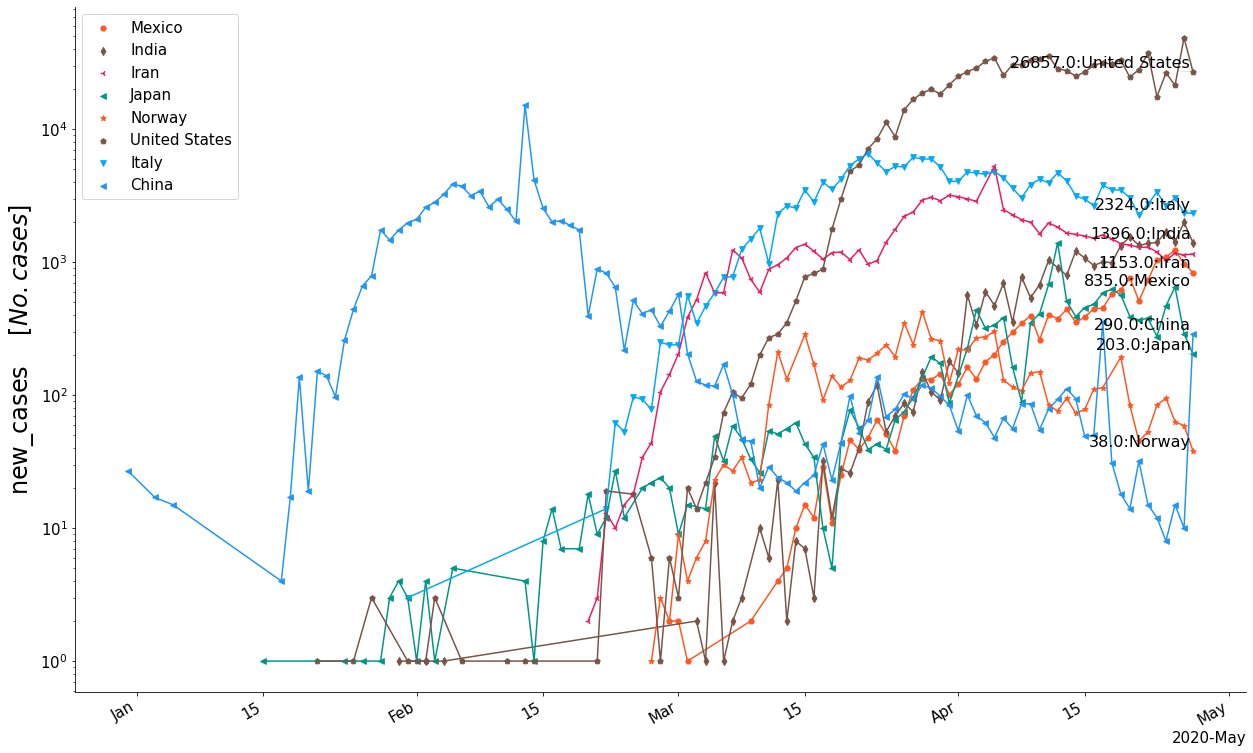

46:Mexico
48:India
60:Iran
3:Japan
2:Norway
1687:United States
260:Italy
3:China


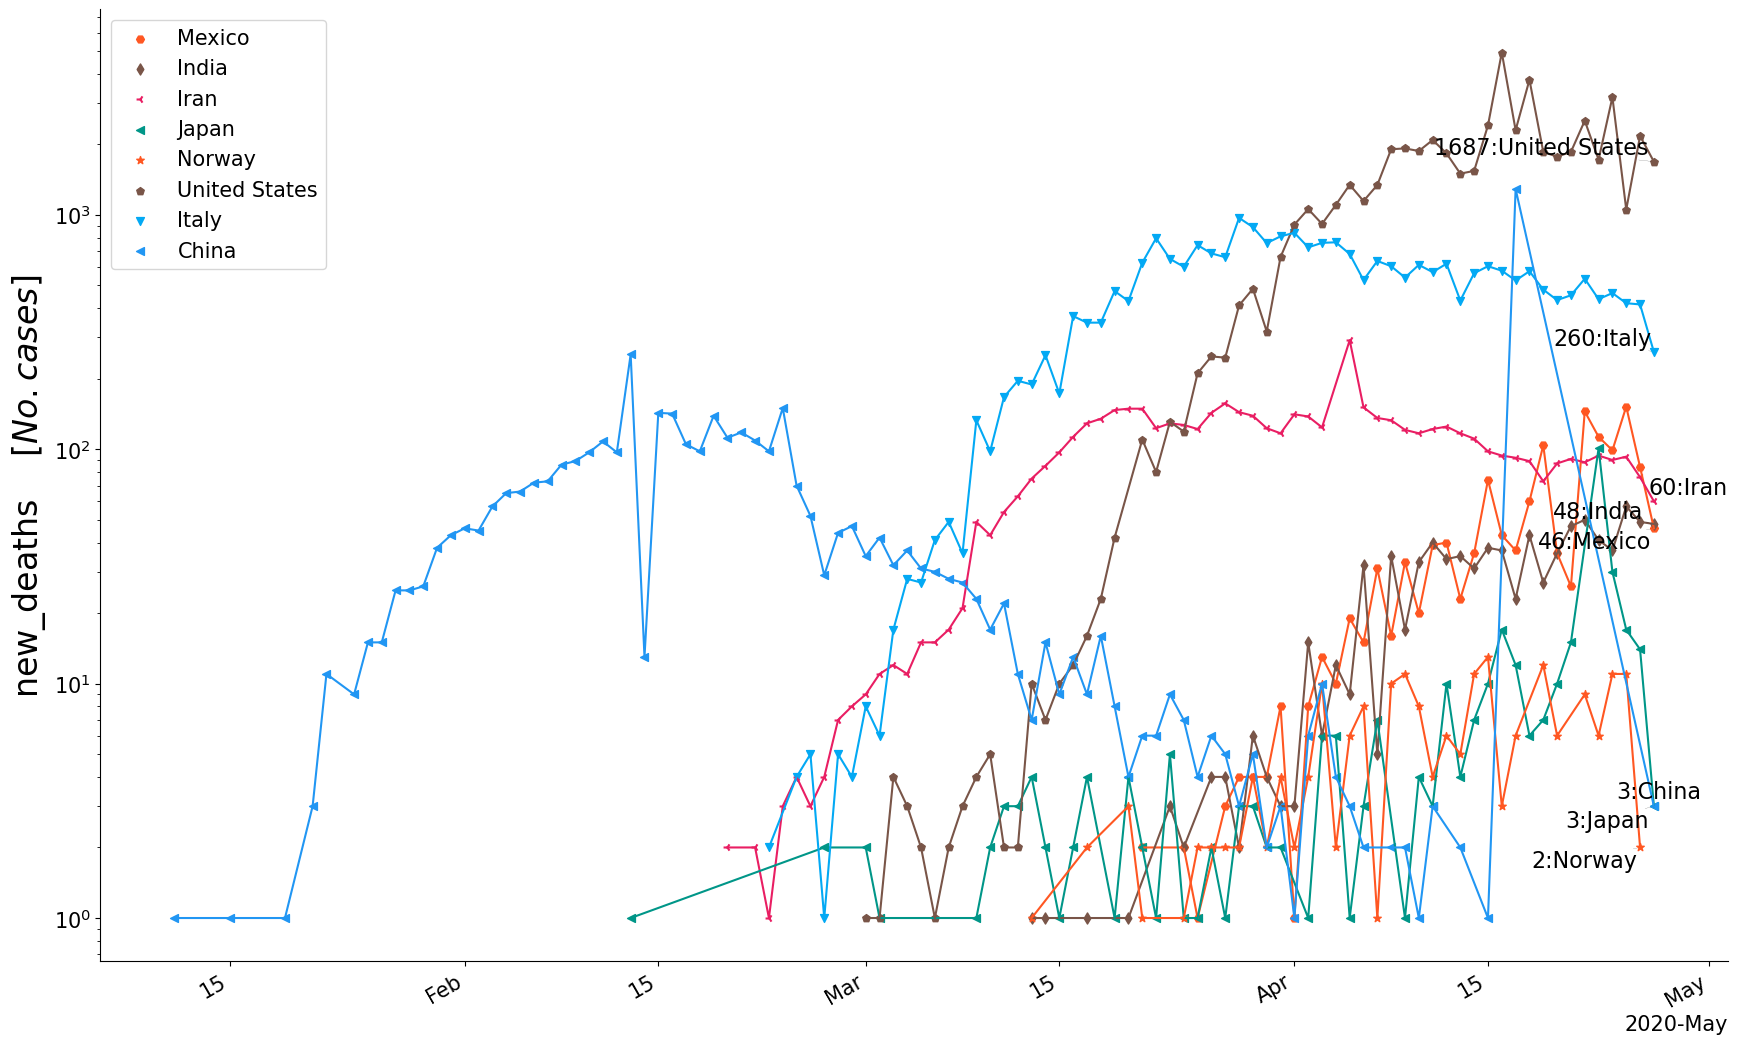

14677.0:Mexico
27892.0:India
90481.0:Iran
13385.0:Japan
7505.0:Norway
965910.0:United States
197675.0:Italy
84199.0:China


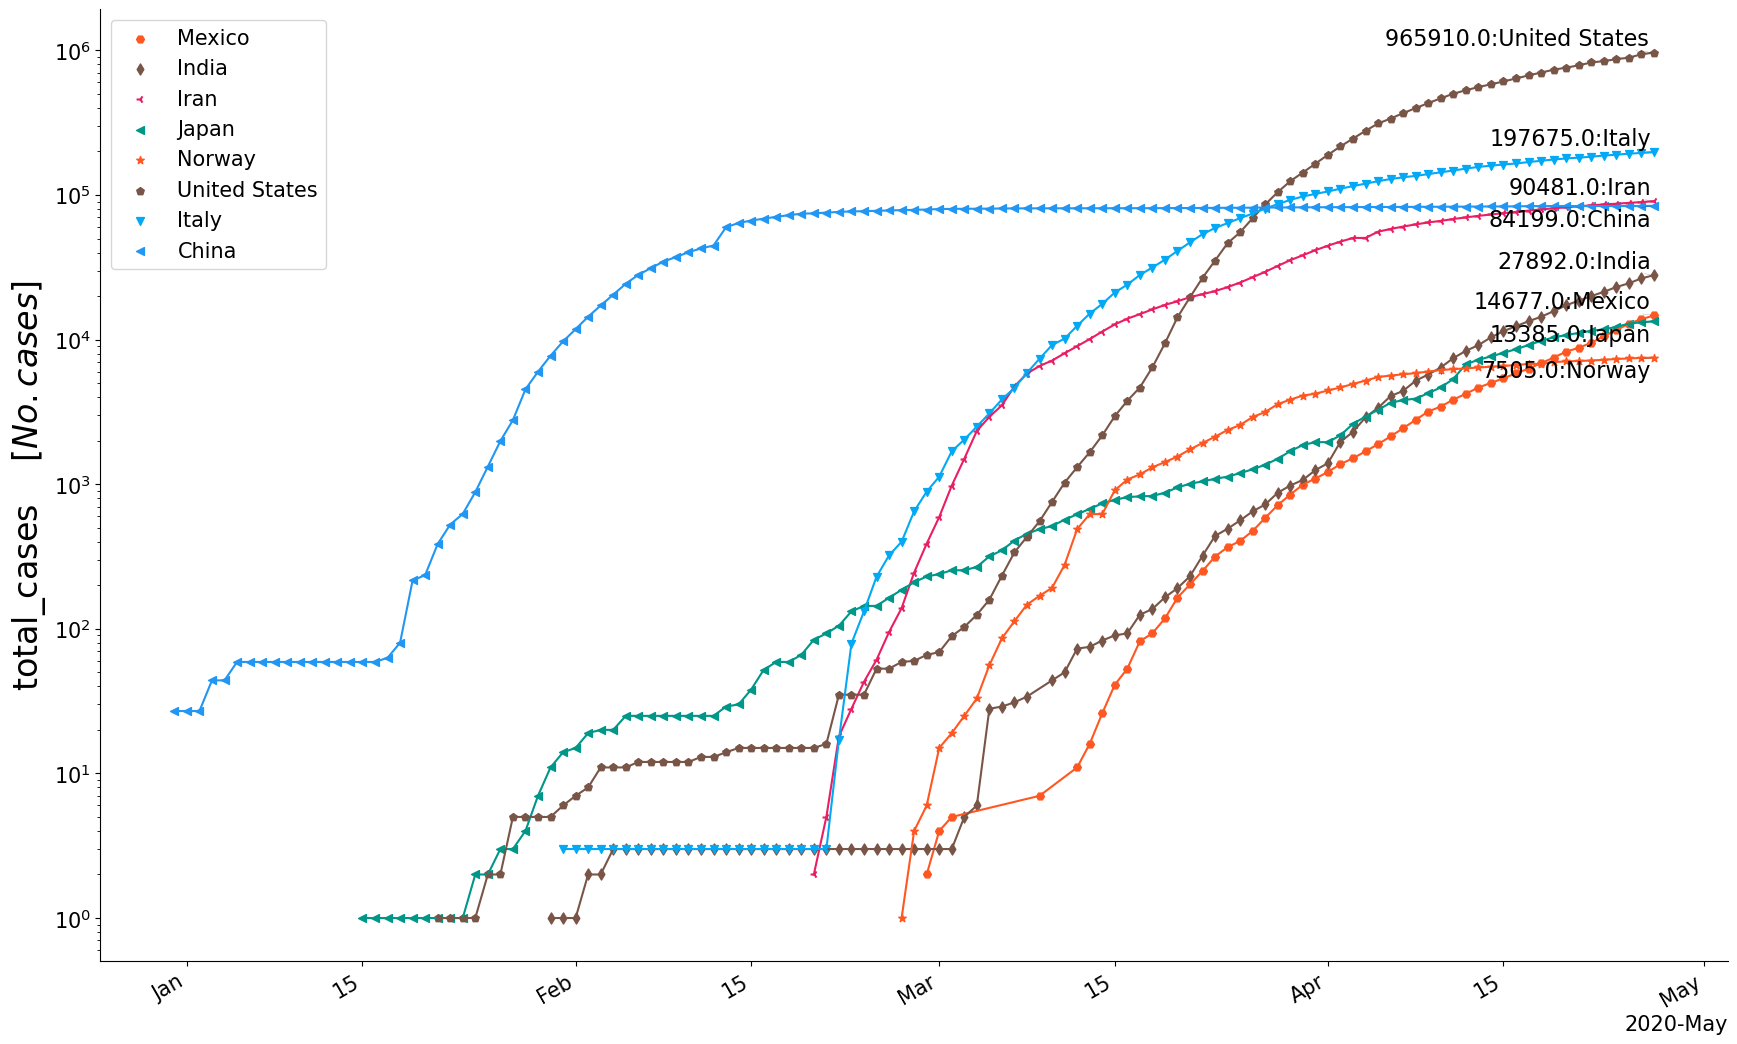

1351:Mexico
872:India
5710:Iran
351:Japan
193:Norway
54876:United States
26644:Italy
4639:China


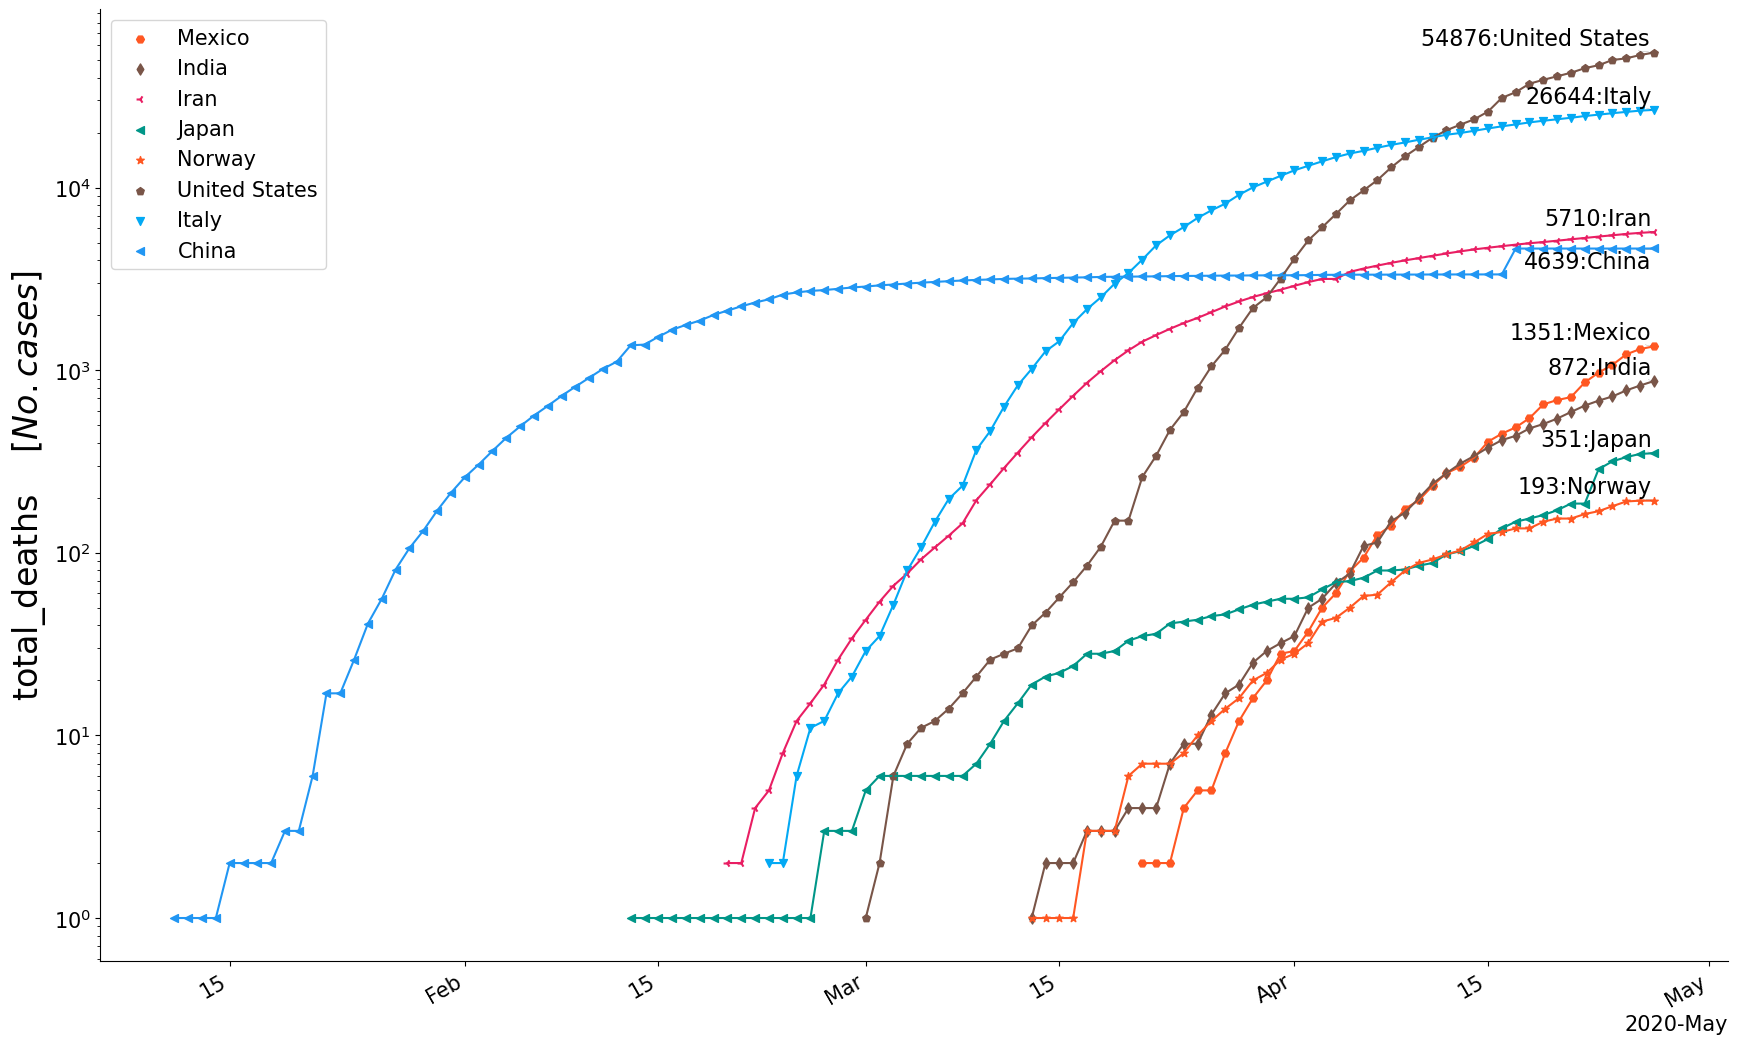

In [9]:
legPos    = 'upper left';
logScale  = True;
countries = ['Mexico','India','Iran','Japan','Norway','United States','Italy','China'];
y_str     = ['new_cases','new_deaths','total_cases','total_deaths'];

genPlots(legPos, logScale, countries, y_str);

835.0:Mexico


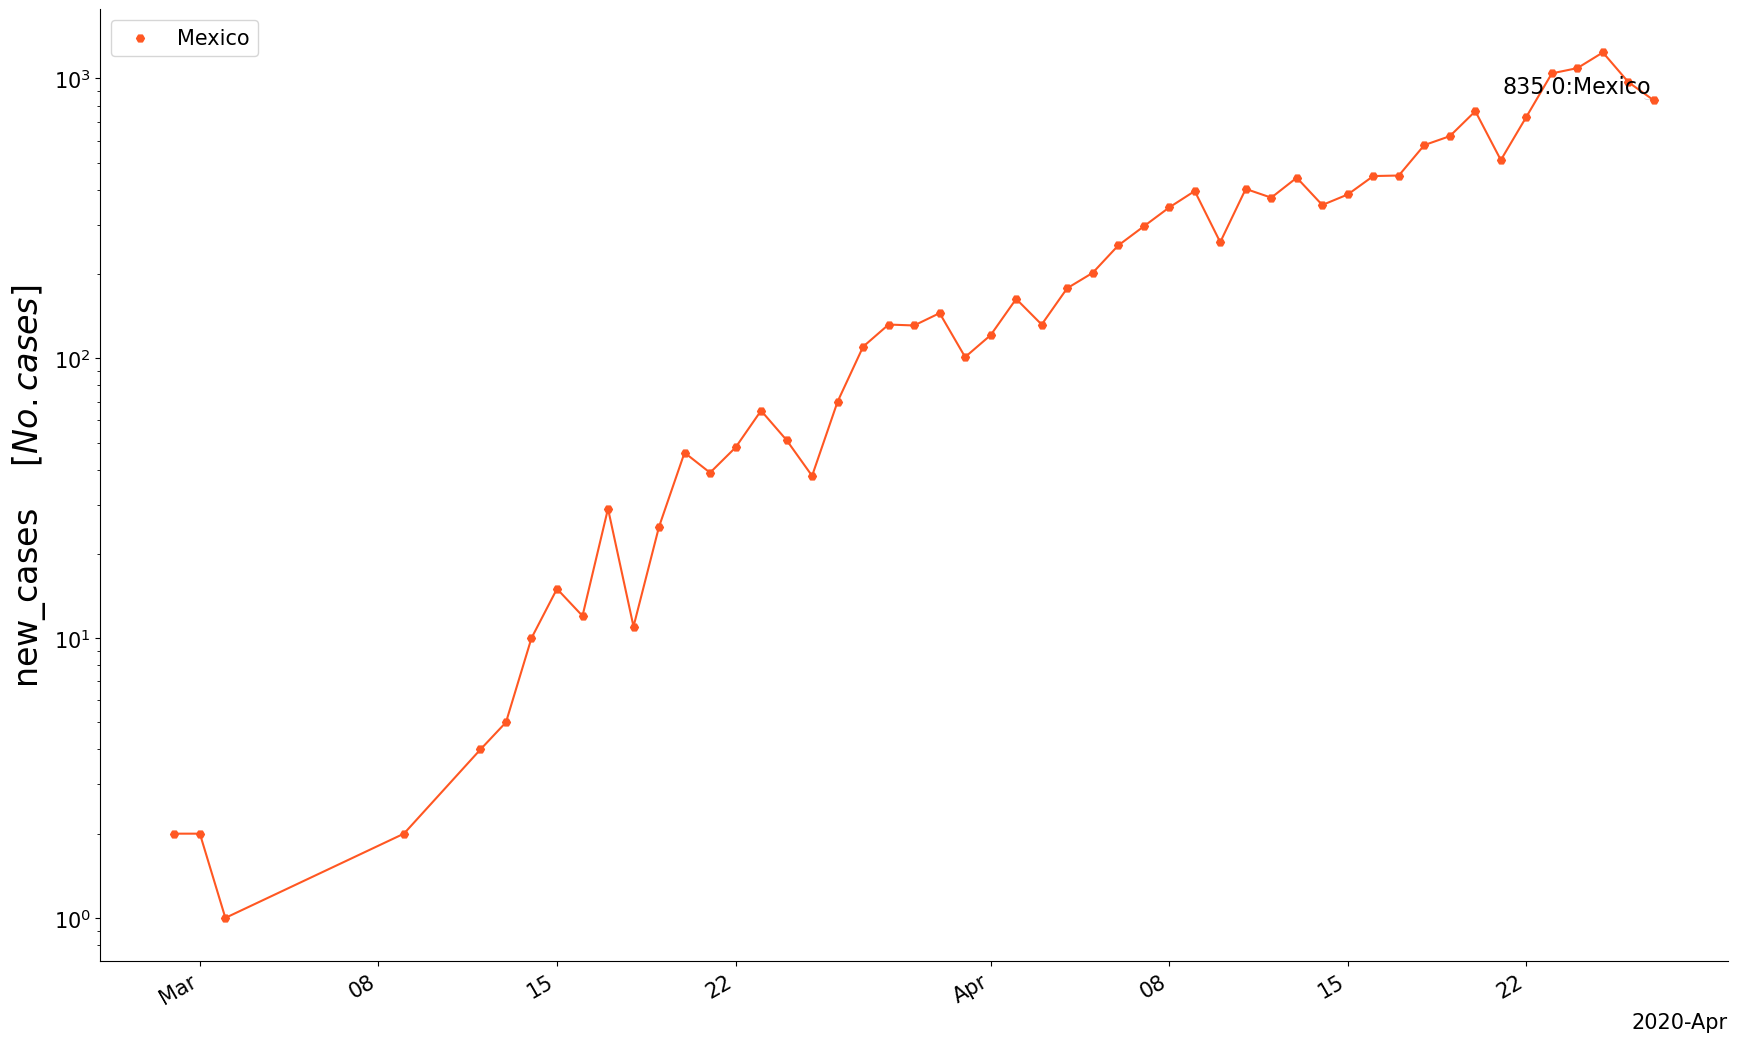

46:Mexico


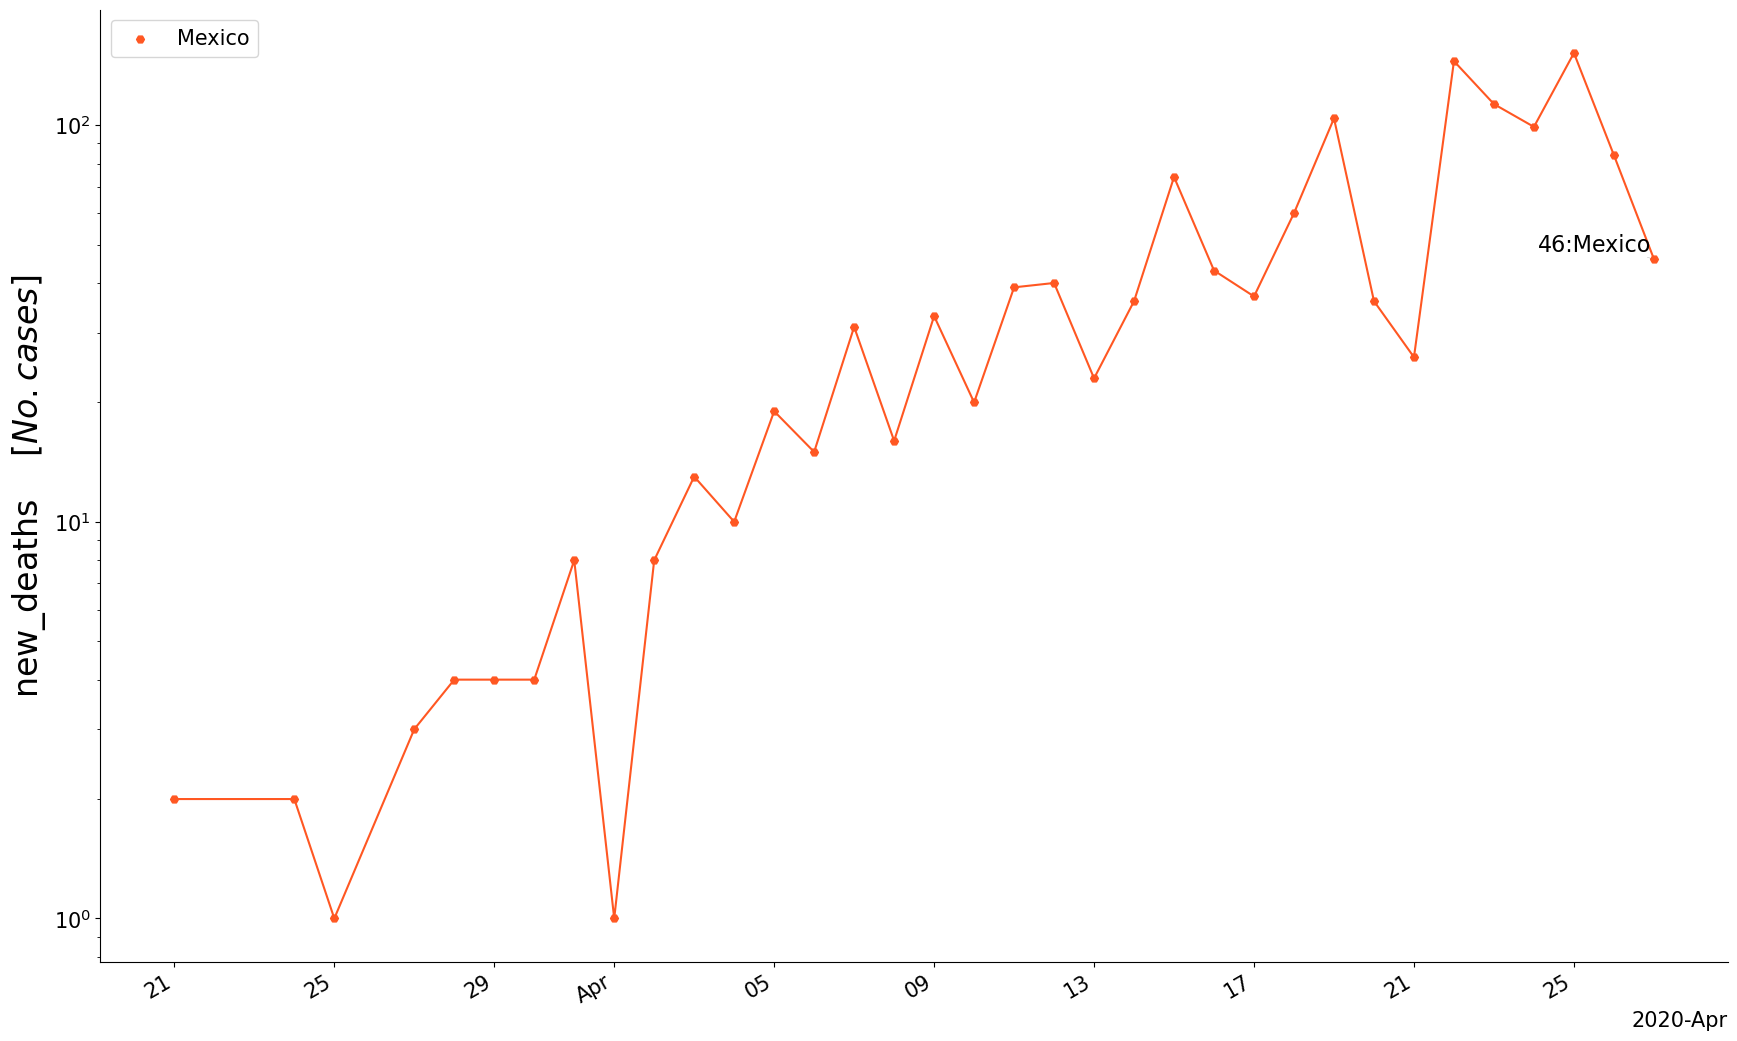

14677.0:Mexico


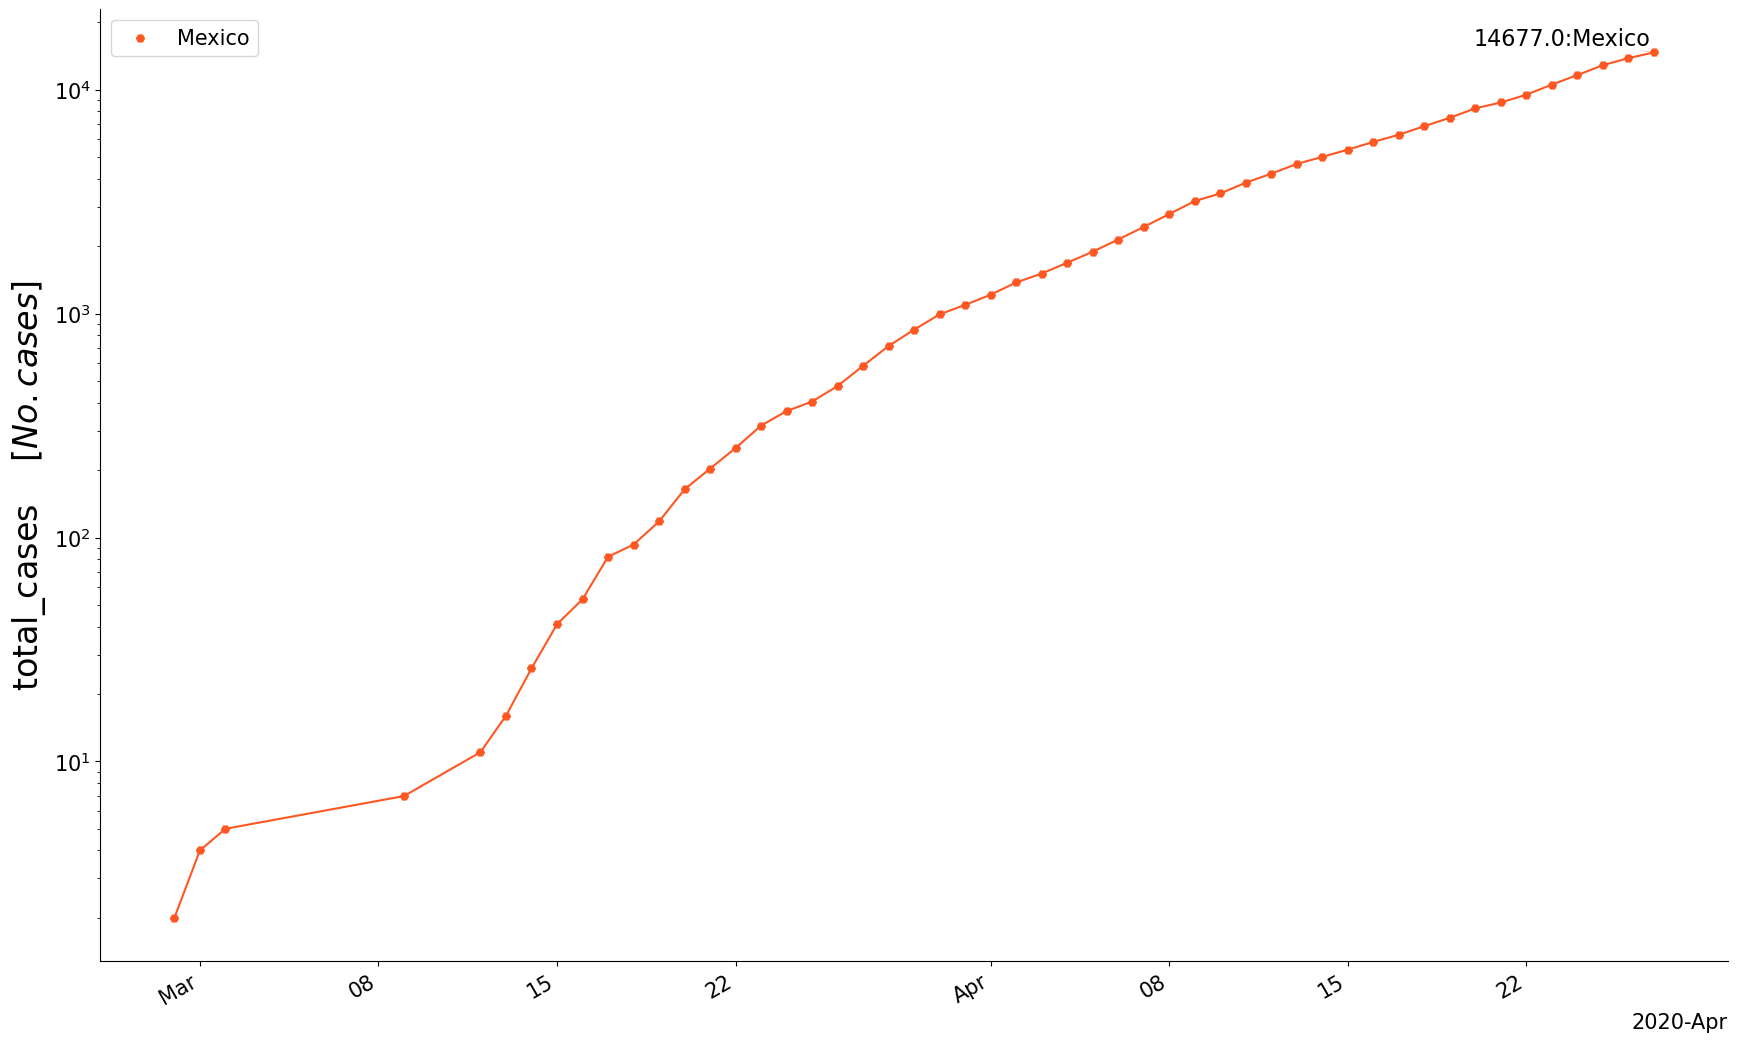

1351:Mexico


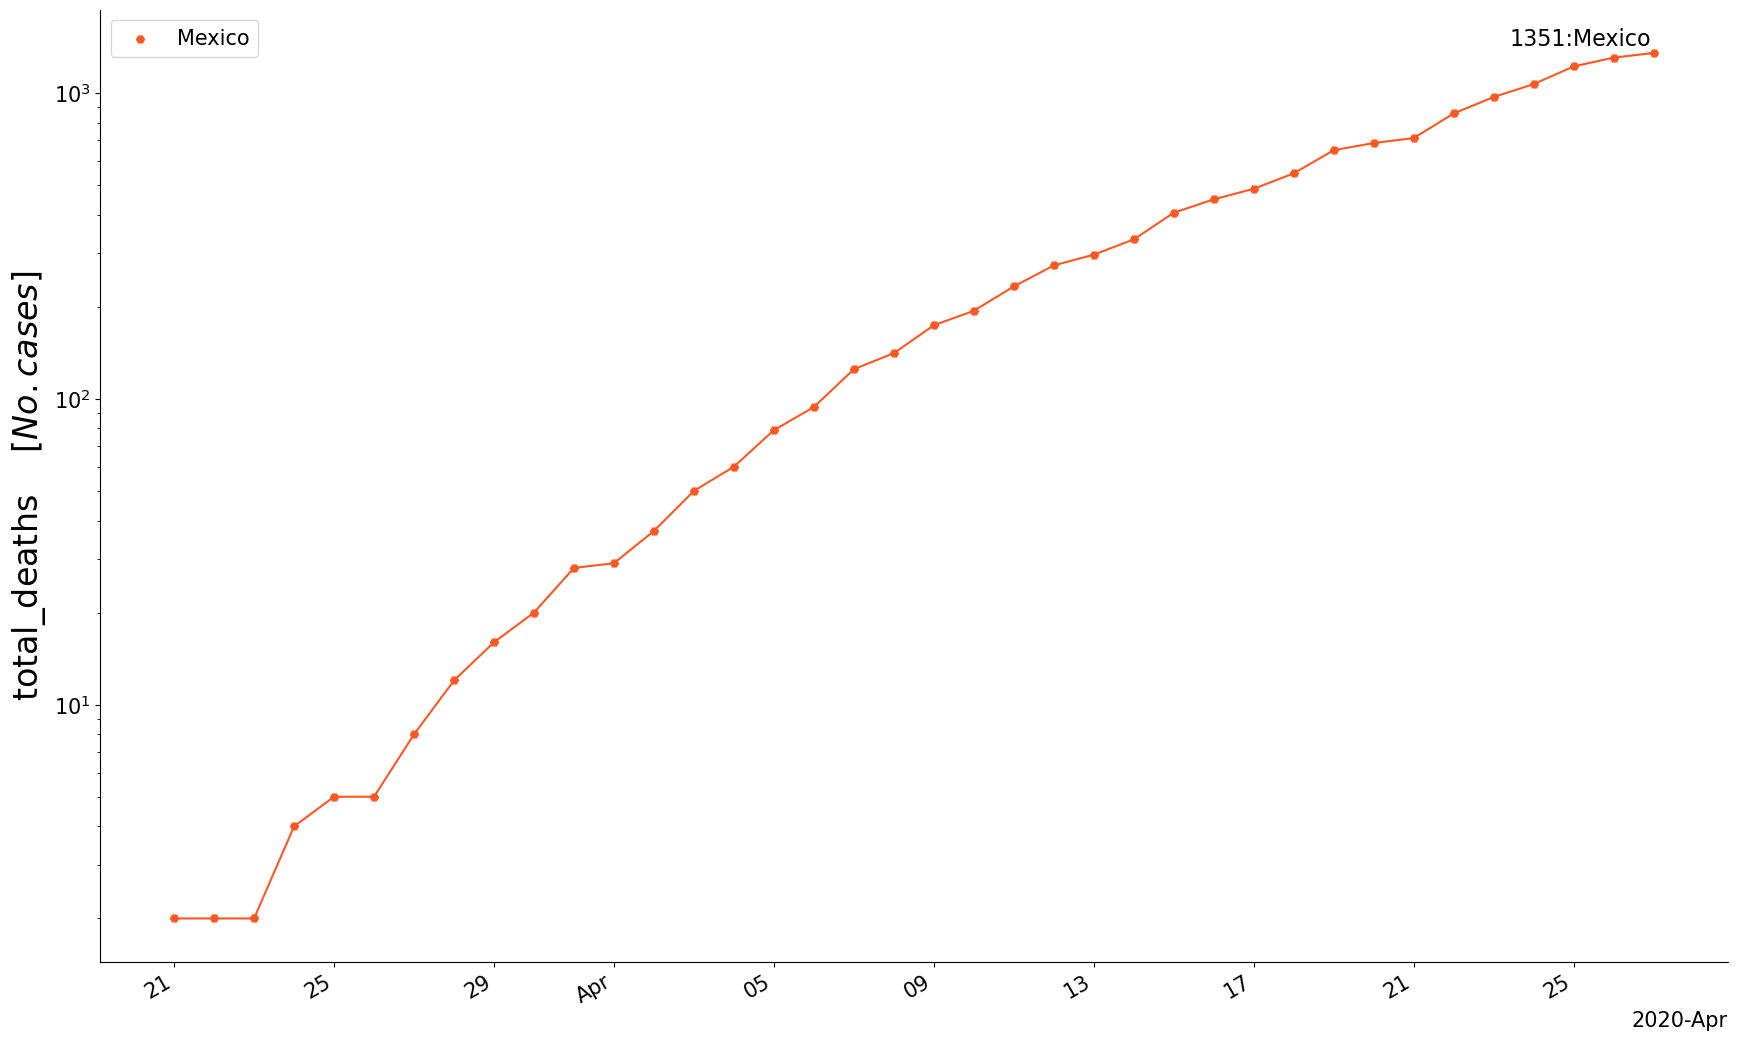

In [10]:
legPos    = 'upper left';
logScale  = True;
countries = ['Mexico'];
y_str     = ['new_cases','new_deaths','total_cases','total_deaths'];

genPlots(legPos, logScale, countries, y_str);